# Linear Regression/LogisticRegression more Features

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn import neighbors
import warnings
warnings.filterwarnings('ignore')

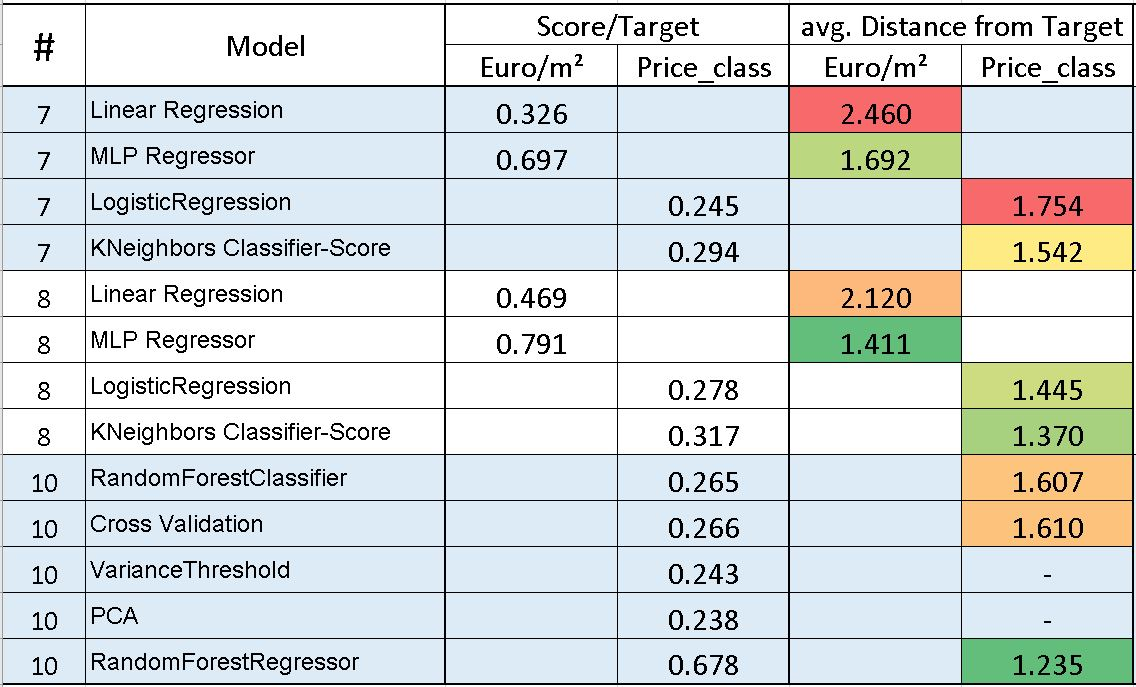

# same process but with additional features made in Notbook 07

In [2]:
# load data set
immo = pd.read_csv('immo_cat.csv')

In [3]:
pd.set_option('display.max_columns', None)
immo.head(1)

Unnamed: 0.1  Unnamed: 0               regio1  serviceCharge  \
0             0           0  Nordrhein_Westfalen          245.0   

       heatingType telekomTvOffer  telekomHybridUploadSpeed  newlyConst  \
0  central_heating  ONE_YEAR_FREE                       0.0           0   

   balcony  picturecount  pricetrend  telekomUploadSpeed  totalRent  \
0        0             6        4.62                10.0      840.0   

   yearConstructed   scoutId  noParkSpaces firingTypes  hasKitchen  \
0           1965.0  96107057           1.0         oil           0   

               geo_bln  cellar  yearConstructedRange  baseRent houseNumber  \
0  Nordrhein_Westfalen       1                   2.0     595.0         244   

   livingSpace   geo_krs  condition interiorQual petsAllowed  \
0         86.0  Dortmund  well_kept       normal     unknown   

                       street      streetPlain  lift  baseRentRange  \
0  Sch&uuml;ruferstra&szlig;e  Schüruferstraße     0              4   

     typeOfFlat  geo_plz  noRooms  thermalChar  floor  numberOfFloors  \
0  ground_floor    44269      4.0        181.4    1.0             3.0   

   noRoomsRange  garden  livingSpaceRange    regio2   regio3  \
0             4       1                 4  Dortmund  Schüren   

                                         description  \
0  Die ebenerdig zu erreichende Erdgeschosswohnun...   

                                          facilities  heatingCosts  \
0  Die Wohnung ist mit Laminat ausgelegt. Das Bad...        77.111   

  energyEfficiencyClass  lastRefurbish  electricityBasePrice  \
0               unknown         2009.1                 89.11   

   electricityKwhPrice   date  Euro/m2  price_class  regio1_cat  \
0              0.21111  May19     6.92            4        0.51   

   typeOfFlat_cat  heatingType_cat  firingTypes_cat  condition_cat  \
0             0.4             0.54             0.52           0.57   

   interiorQual_cat  petsAllowed_cat  energyEfficiencyClass_cat  
0               0.3             0.95                       0.61

In [4]:
immo.head(1)

Unnamed: 0.1  Unnamed: 0               regio1  serviceCharge  \
0             0           0  Nordrhein_Westfalen          245.0   

       heatingType telekomTvOffer  telekomHybridUploadSpeed  newlyConst  \
0  central_heating  ONE_YEAR_FREE                       0.0           0   

   balcony  picturecount  pricetrend  telekomUploadSpeed  totalRent  \
0        0             6        4.62                10.0      840.0   

   yearConstructed   scoutId  noParkSpaces firingTypes  hasKitchen  \
0           1965.0  96107057           1.0         oil           0   

               geo_bln  cellar  yearConstructedRange  baseRent houseNumber  \
0  Nordrhein_Westfalen       1                   2.0     595.0         244   

   livingSpace   geo_krs  condition interiorQual petsAllowed  \
0         86.0  Dortmund  well_kept       normal     unknown   

                       street      streetPlain  lift  baseRentRange  \
0  Sch&uuml;ruferstra&szlig;e  Schüruferstraße     0              4   

     typeOfFlat  geo_plz  noRooms  thermalChar  floor  numberOfFloors  \
0  ground_floor    44269      4.0        181.4    1.0             3.0   

   noRoomsRange  garden  livingSpaceRange    regio2   regio3  \
0             4       1                 4  Dortmund  Schüren   

                                         description  \
0  Die ebenerdig zu erreichende Erdgeschosswohnun...   

                                          facilities  heatingCosts  \
0  Die Wohnung ist mit Laminat ausgelegt. Das Bad...        77.111   

  energyEfficiencyClass  lastRefurbish  electricityBasePrice  \
0               unknown         2009.1                 89.11   

   electricityKwhPrice   date  Euro/m2  price_class  regio1_cat  \
0              0.21111  May19     6.92            4        0.51   

   typeOfFlat_cat  heatingType_cat  firingTypes_cat  condition_cat  \
0             0.4             0.54             0.52           0.57   

   interiorQual_cat  petsAllowed_cat  energyEfficiencyClass_cat  
0               0.3             0.95                       0.61

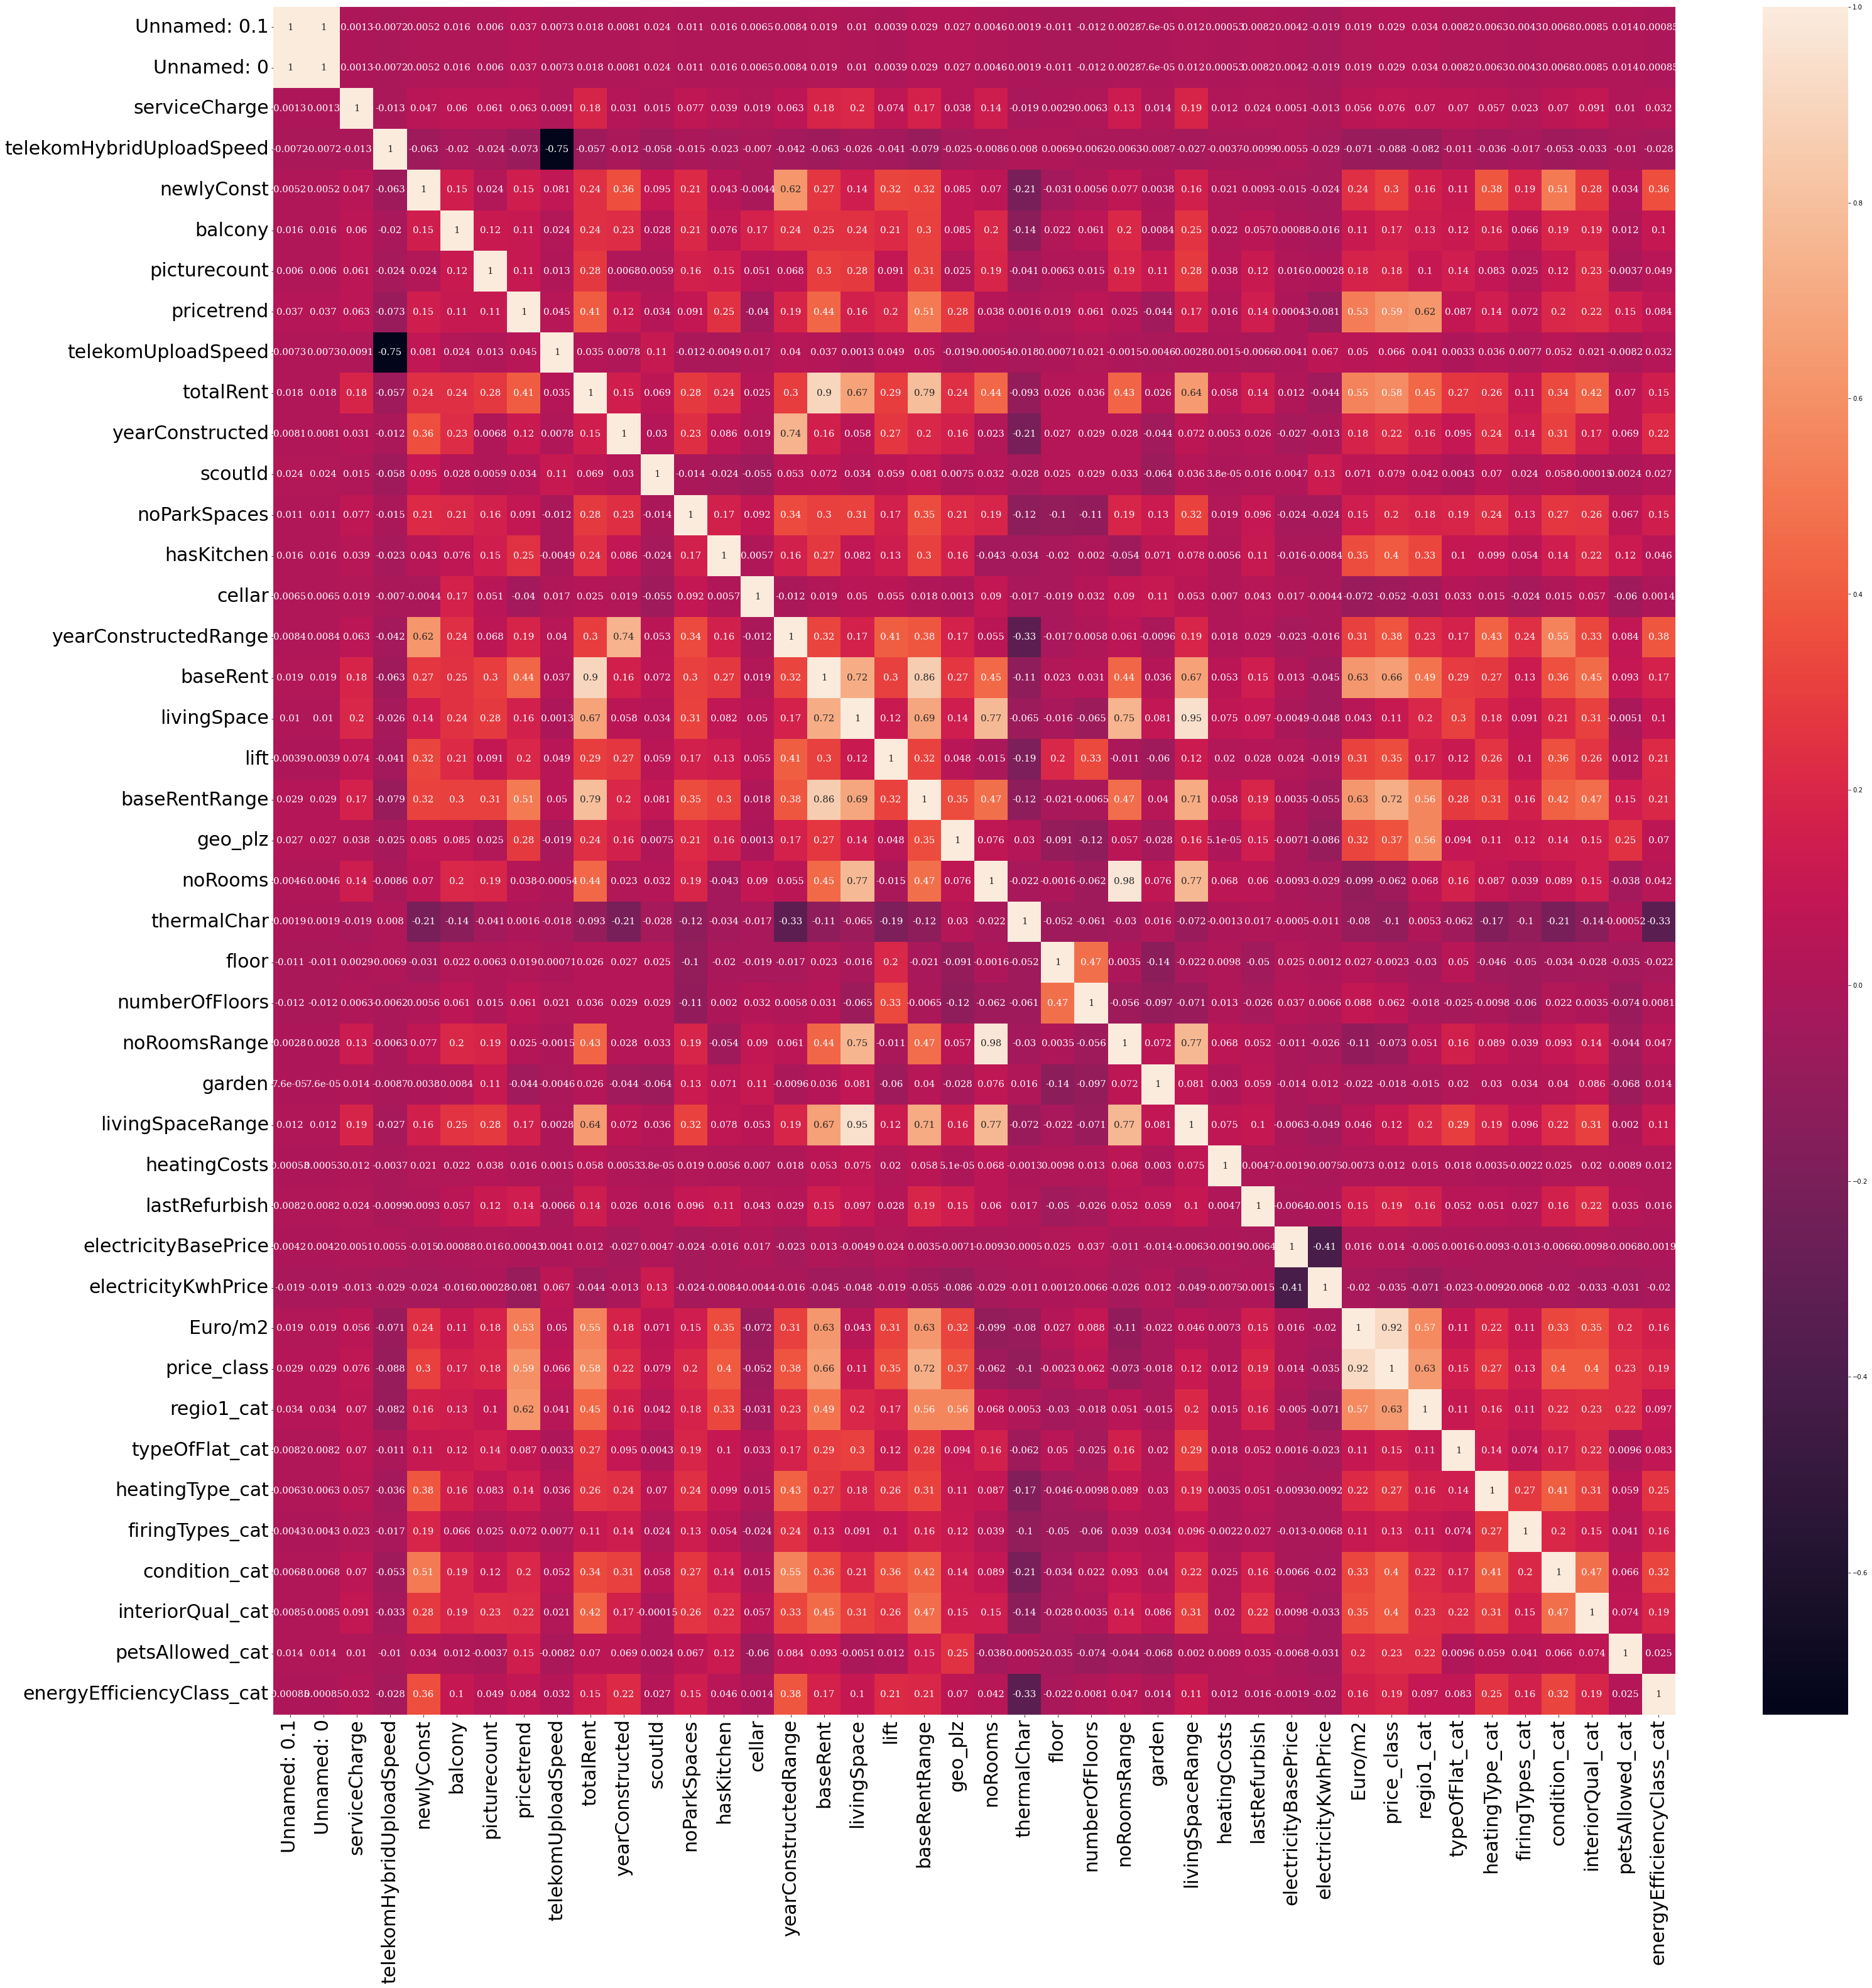

In [5]:
correlations_matrix = immo.corr()
fig, ax = plt.subplots(figsize=(50,50)) 
sns.heatmap(correlations_matrix, annot=True, fmt='.2g', annot_kws={
                'fontsize': 15,
                'fontfamily': 'serif'
            })
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
fig.savefig("heatmap.jpg")
plt.show()

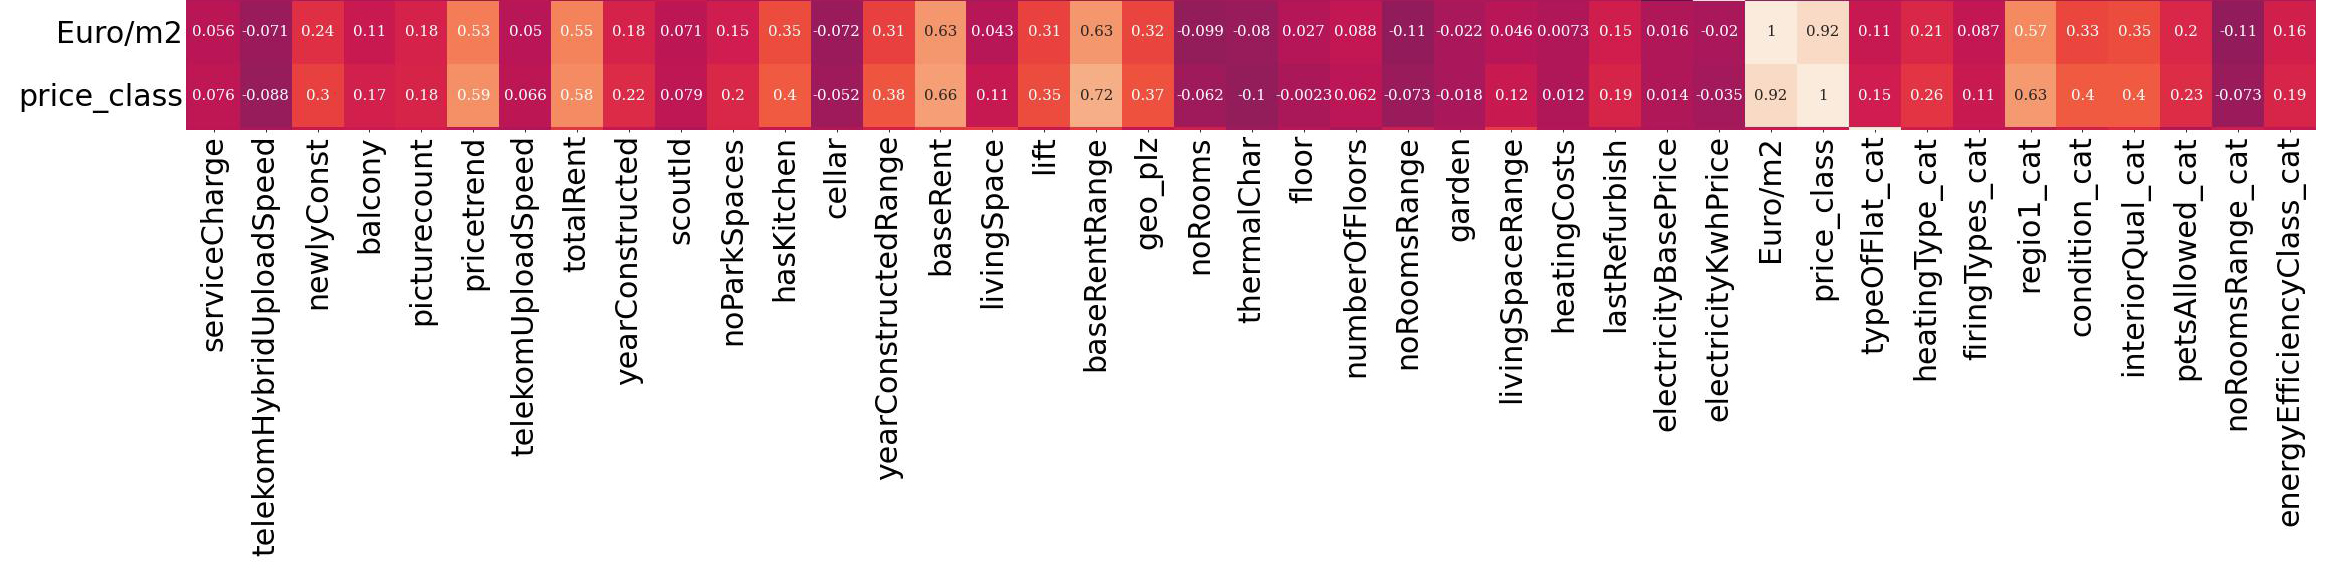

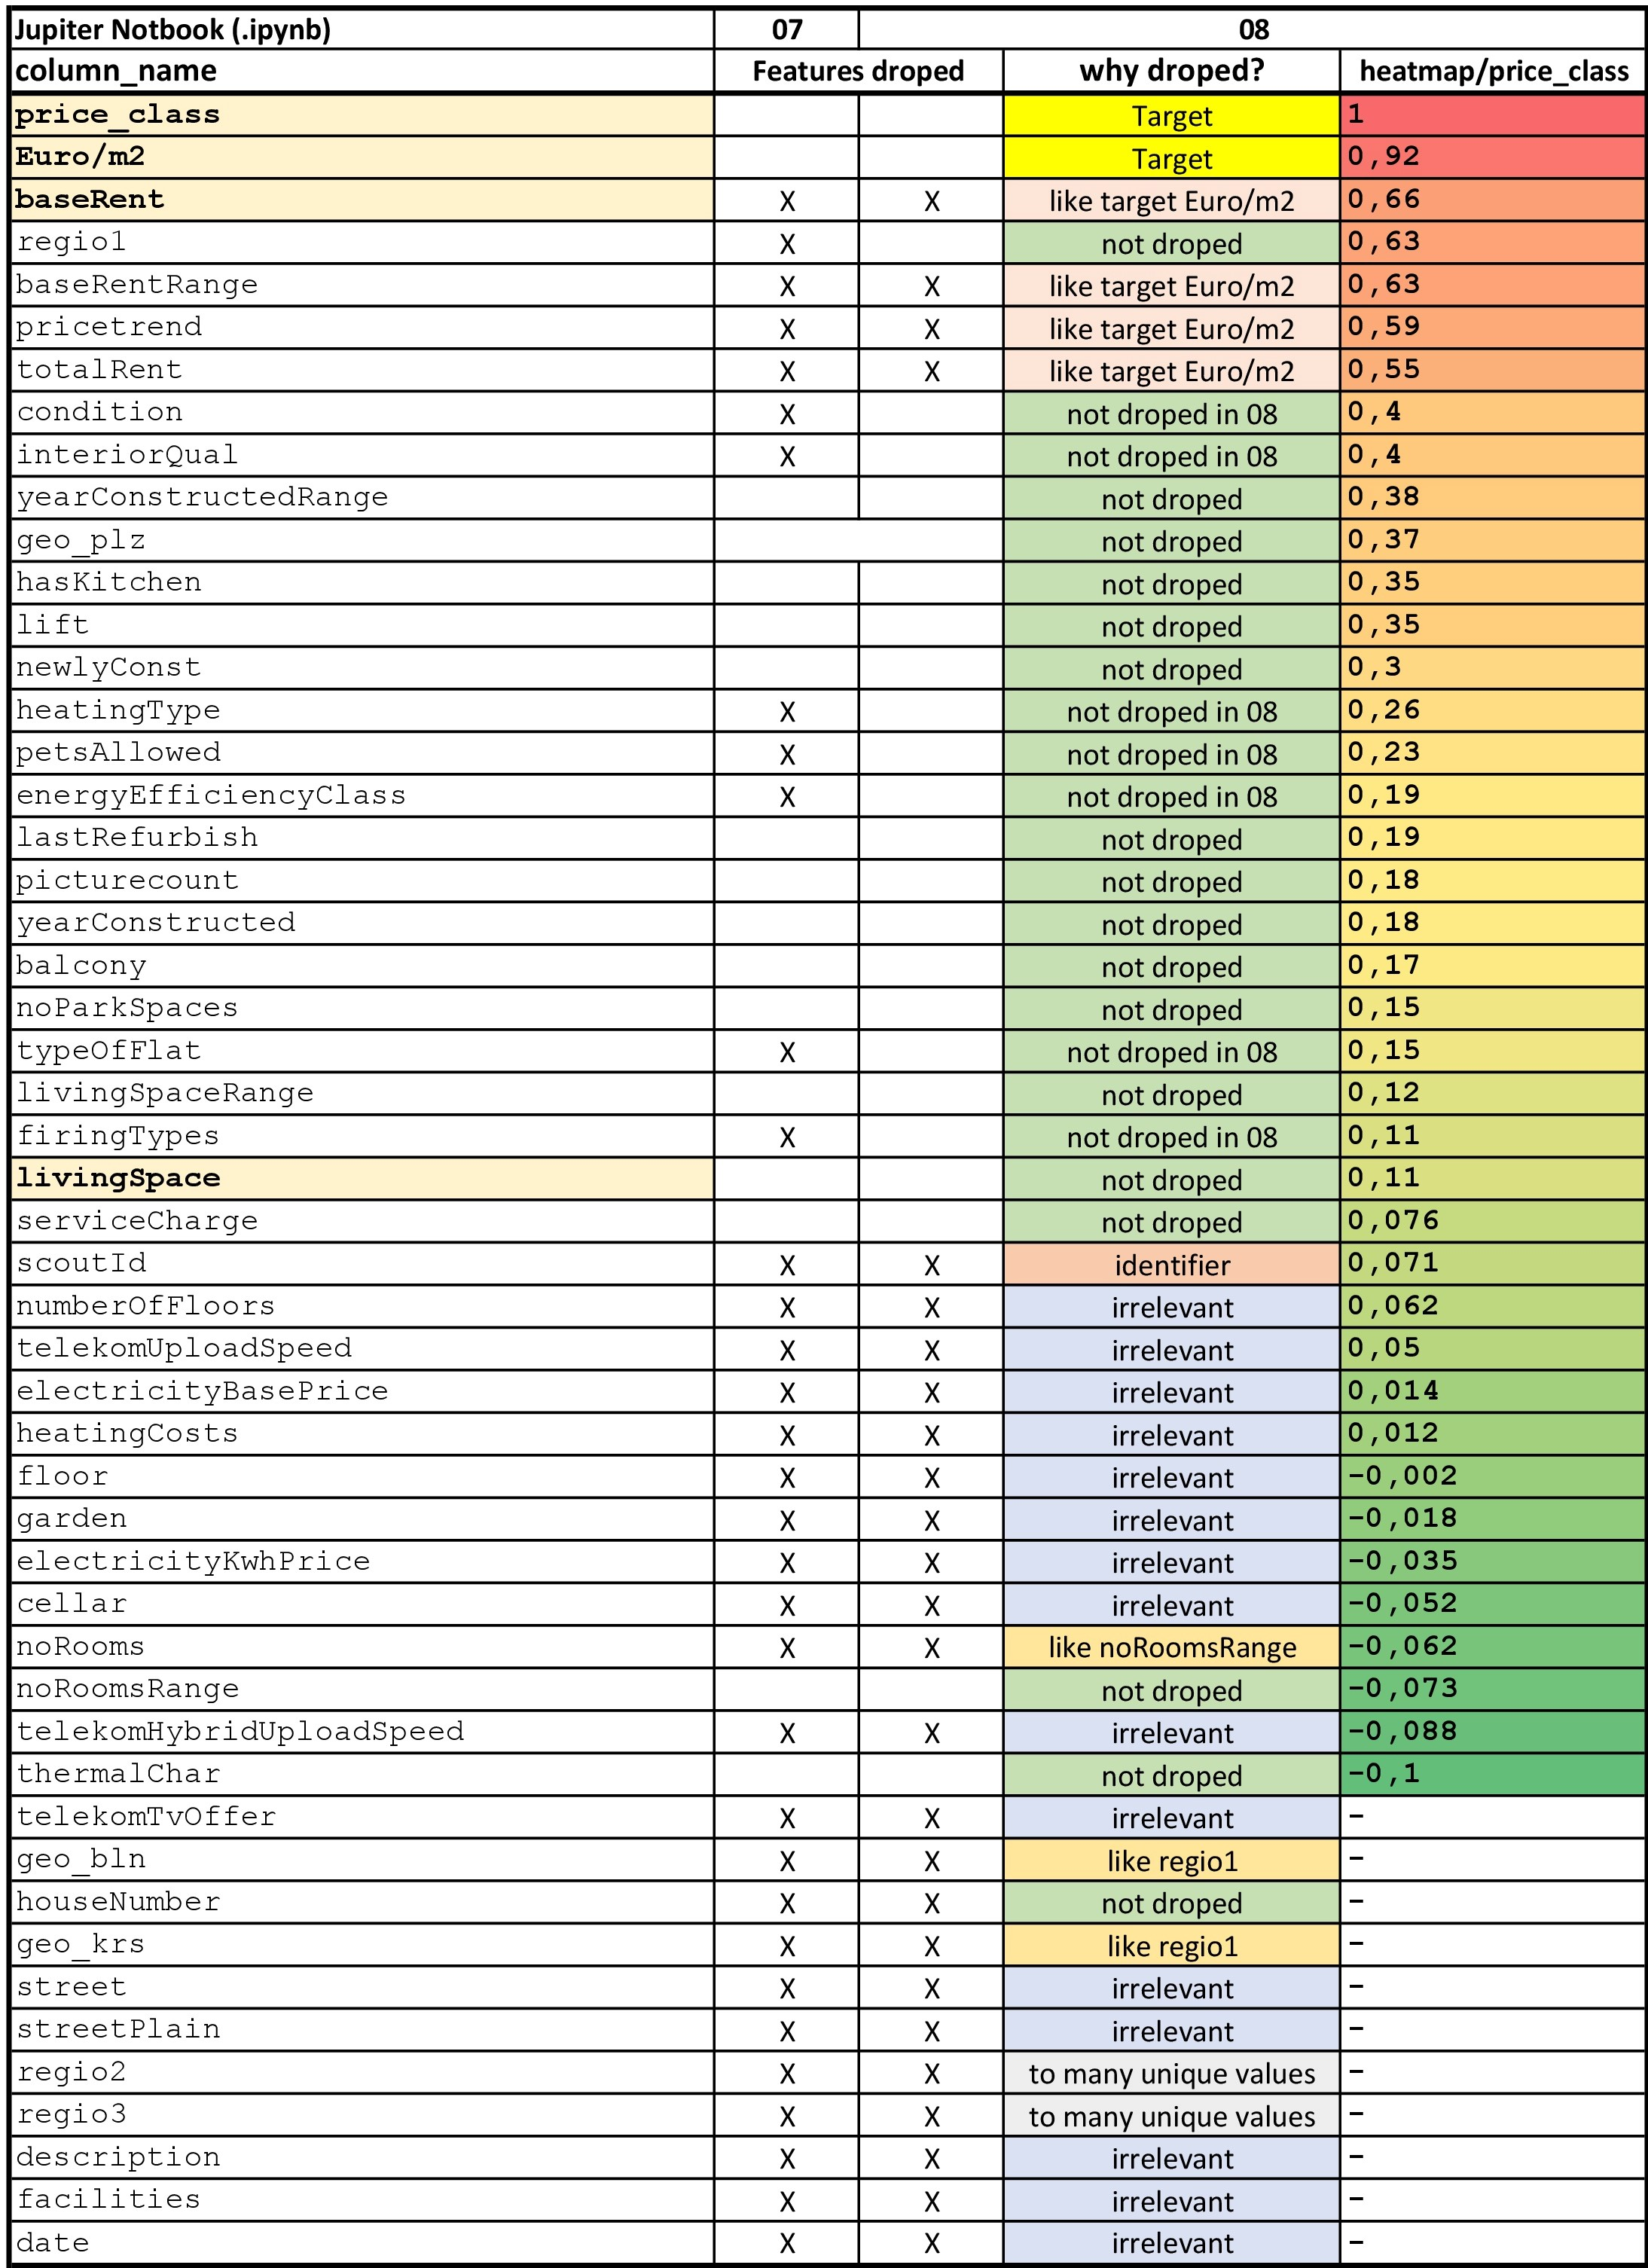

### Feature selection

In [6]:
x = immo[['serviceCharge', 'newlyConst', 'balcony', 'picturecount', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'yearConstructedRange', 'livingSpace', 'lift', 'geo_plz', 'lastRefurbish','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','noRoomsRange','thermalChar',  'energyEfficiencyClass_cat']].copy()
x.head(5)
# geo_plz is not realy

serviceCharge  newlyConst  balcony  picturecount  yearConstructed  \
0         245.00           0        0             6           1965.0   
1         134.00           0        1             8           1871.0   
2         255.00           1        1             8           2019.0   
3          58.15           0        1             9           1964.0   
4         138.00           0        1            19           1950.0   

   noParkSpaces  hasKitchen  yearConstructedRange  livingSpace  lift  geo_plz  \
0           1.0           0                   2.0        86.00     0    44269   
1           2.0           0                   1.0        89.00     0    67459   
2           1.0           0                   9.0        83.80     1     1097   
3           0.0           0                   2.0        58.15     0     9599   
4           0.0           0                   1.0        84.97     0    28213   

   lastRefurbish  typeOfFlat_cat  heatingType_cat  firingTypes_cat  \
0         2009.1             0.4             0.54             0.52   
1         2019.0             0.4             0.55             0.48   
2         2009.1             0.4             1.00             0.52   
3         2009.1             0.4             0.54             0.48   
4         2009.1             0.4             0.55             0.48   

   regio1_cat  condition_cat  interiorQual_cat  petsAllowed_cat  noRoomsRange  \
0        0.51           0.57              0.30             0.95             4   
1        0.58           0.52              0.30             1.00             3   
2        0.38           1.00              0.56             0.95             3   
3        0.38           0.61              0.37             0.95             3   
4        0.52           0.52              0.37             0.95             3   

   thermalChar  energyEfficiencyClass_cat  
0       181.40                       0.61  
1       114.11                       0.61  
2       114.11                       0.61  
3        86.00                       0.61  
4       188.90                       0.61

### Linear Regression target selection (Euro/m²)

In [7]:
y = immo[['Euro/m2']].copy()

### Linear Regression train test split

In [8]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [9]:
print('train_X= ',train_X.shape)
print('test_X= ',test_X.shape)
print('train_Y= ',train_Y.shape)
print('test_Y= ',test_Y.shape)

train_X=  (214248, 22)
test_X=  (53562, 22)
train_Y=  (214248, 1)
test_Y=  (53562, 1)


In [10]:
# Scaling data
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

# Linear Regression

In [11]:
linreg=LinearRegression()    # model
linreg.fit(train_X, train_Y)   # model train
y_pred_linreg=linreg.predict(test_X)   # model prediction
print ('train R2: {} -- test R2: {}'.format(linreg.score(train_X, train_Y),
                                            linreg.score(test_X, test_Y)))

# mean squared error
train_mse=mse(linreg.predict(train_X), train_Y)
test_mse=mse(linreg.predict(test_X), test_Y)
print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

#mean_absolute_error
train_mae=mae(linreg.predict(train_X), train_Y)
test_mae=mae(linreg.predict(test_X), test_Y)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

def normalize(X):         # normalization function
    X_mean=X.mean(axis=0)
    X_std=X.std(axis=0)
    X_std[X_std==0]=1.0
    X=(X-X_mean)/X_std
    return X

train R2: 0.47705845215033604 -- test R2: 0.4688135017429965
train MSE: 11.249421339131567 -- test MSE: 11.560290306264623
train RMSE: 3.3540157034712235 -- test RMSE: 3.4000426918297104
train MAE: 11.249421339131567 -- test MAE: 11.560290306264623


# MLP Regressor

In [12]:
# Fitting and training the model
mlp = MLPRegressor(hidden_layer_sizes=(50, 50))
mlp.fit(train_X, train_Y)

# Predictions on TEST data and score
mlp_test_predictions = mlp.predict(test_X)
mlp_test_score = r2_score(test_Y,mlp_test_predictions)
print("mlp_test_score is: ", mlp_test_score)

mlp_test_score is:  0.7912244931714622


#### Distance (Linear Regression)
-->calculates the average distance (difference) between target (base rent [Euro]/living space[m]) and prediction (in [Euro/m²])

In [13]:
dist1=pd.concat([test_Y], axis=1)
dist1['predicted'] = y_pred_linreg
dist1['difference'] = round(((dist1['Euro/m2']-dist1['predicted'])**2)**(1/2),2)

In [14]:
dist1

Euro/m2  predicted  difference
204337     4.92   4.997857        0.08
215731     6.42  10.045199        3.63
168163    11.02  12.805653        1.79
64568      4.58   6.186798        1.61
267465     6.00   5.114070        0.89
...         ...        ...         ...
90274      8.67   9.166563        0.50
1498       6.25   8.256605        2.01
5525       5.20   5.797541        0.60
54995      5.06   6.631613        1.57
23183      8.80   9.982436        1.18

[53562 rows x 3 columns]

In [15]:
dist1['difference'].mean()

2.11993297487023

#### Distance (MLP)

In [16]:
dist2=pd.concat([test_Y], axis=1)
dist2['predicted'] = mlp_test_predictions
dist2['difference'] = round(((dist2['Euro/m2']-dist2['predicted'])**2)**(1/2),2)

In [17]:
dist2

Euro/m2  predicted  difference
204337     4.92   6.022966        1.10
215731     6.42   7.825185        1.41
168163    11.02  12.646207        1.63
64568      4.58   5.610144        1.03
267465     6.00   6.825896        0.83
...         ...        ...         ...
90274      8.67   8.426591        0.24
1498       6.25   6.588408        0.34
5525       5.20   5.625489        0.43
54995      5.06   5.227856        0.17
23183      8.80   7.414676        1.39

[53562 rows x 3 columns]

In [18]:
dist2['difference'].mean()

1.410897838019486

# Multi-class classification & Classification model

In [19]:
# Target (y) and Feature selection (X)
y = immo[['price_class']].copy()
X = immo[['serviceCharge','newlyConst','balcony','picturecount','yearConstructed','noParkSpaces','hasKitchen', 'yearConstructedRange','livingSpace','lift','geo_plz', 'noRoomsRange','lastRefurbish','garden','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','noRoomsRange','thermalChar', 'energyEfficiencyClass_cat']].copy()
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train_num = X_train[['serviceCharge','picturecount','yearConstructed','noParkSpaces','yearConstructedRange',
                       'livingSpace','geo_plz','lastRefurbish','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat', 'energyEfficiencyClass_cat']]
X_train_cat = X_train[['newlyConst','balcony','hasKitchen','lift', 'garden']]

In [21]:
# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [22]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

serviceCharge  picturecount  yearConstructed  noParkSpaces  \
0       0.000684      0.115702         0.876592          0.00   
1       0.000845      0.008264         0.944172          0.00   
2       0.001369      0.115702         0.998041          0.25   
3       0.001027      0.074380         0.998041          0.25   
4       0.001164      0.008264         0.993144          0.00   

   yearConstructedRange  livingSpace   geo_plz  lastRefurbish  typeOfFlat_cat  \
0                 0.000     0.110764  0.990801       0.842029        0.076923   
1                 0.125     0.064290  0.075011       0.842029        0.076923   
2                 1.000     0.135725  0.862657       0.842029        0.076923   
3                 1.000     0.095944  0.654671       0.842029        0.076923   
4                 0.875     0.075959  0.173512       0.842029        0.076923   

   typeOfFlat_cat  heatingType_cat  heatingType_cat  firingTypes_cat  \
0        0.076923         0.224138         0.224138         0.000000   
1        0.076923         0.206897         0.206897         0.000000   
2        0.076923         0.844828         0.844828         0.615385   
3        0.076923         1.000000         1.000000         0.076923   
4        0.076923         1.000000         1.000000         0.076923   

   firingTypes_cat  regio1_cat  regio1_cat  condition_cat  condition_cat  \
0         0.000000    0.028986    0.028986       0.203704       0.203704   
1         0.000000    0.101449    0.101449       0.259259       0.259259   
2         0.615385    0.797101    0.797101       1.000000       1.000000   
3         0.076923    0.739130    0.739130       1.000000       1.000000   
4         0.076923    0.057971    0.057971       0.277778       0.277778   

   interiorQual_cat  interiorQual_cat  petsAllowed_cat  petsAllowed_cat  \
0          0.136986          0.136986              0.2              0.2   
1          0.041096          0.041096              0.0              0.0   
2          0.397260          0.397260              0.0              0.0   
3          0.397260          0.397260              0.5              0.5   
4          0.397260          0.397260              0.0              0.0   

   energyEfficiencyClass_cat  
0                   0.000000  
1                   0.204082  
2                   0.204082  
3                   0.204082  
4                   0.489796

In [23]:
X_train_cat = pd.get_dummies(X_train_cat, columns=['newlyConst','balcony','hasKitchen','lift', 'garden'],drop_first=True)
X_train_cat.head()

newlyConst_1  balcony_1  hasKitchen_1  lift_1  garden_1
50850              0          1             1       0         0
17253              0          1             0       0         0
217025             1          1             0       0         0
151326             1          1             0       1         0
177498             0          0             0       0         0

In [24]:
# encoding data
encoder = OneHotEncoder(drop='first').fit(X_train_cat) 

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
display(X_train_cat_encode.head())
X_train_cat_encode.shape

newlyConst_1_1  balcony_1_1  hasKitchen_1_1  lift_1_1  garden_1_1
0             0.0          1.0             1.0       0.0         0.0
1             0.0          1.0             0.0       0.0         0.0
2             1.0          1.0             0.0       0.0         0.0
3             1.0          1.0             0.0       1.0         0.0
4             0.0          0.0             0.0       0.0         0.0

(214248, 5)

In [25]:
X_train_transformed = pd.concat([X_train_norm, X_train_cat_encode], axis=1)
X_train_transformed

serviceCharge  picturecount  yearConstructed  noParkSpaces  \
0            0.000684      0.115702         0.876592          0.00   
1            0.000845      0.008264         0.944172          0.00   
2            0.001369      0.115702         0.998041          0.25   
3            0.001027      0.074380         0.998041          0.25   
4            0.001164      0.008264         0.993144          0.00   
...               ...           ...              ...           ...   
214243       0.001163      0.066116         0.953967          0.25   
214244       0.001779      0.066116         0.848188          0.25   
214245       0.001574      0.082645         0.997062          0.25   
214246       0.000602      0.024793         0.950049          0.00   
214247       0.000479      0.074380         0.953085          0.00   

        yearConstructedRange  livingSpace   geo_plz  lastRefurbish  \
0                     0.0000     0.110764  0.990801       0.842029   
1                     0.1250     0.064290  0.075011       0.842029   
2                     1.0000     0.135725  0.862657       0.842029   
3                     1.0000     0.095944  0.654671       0.842029   
4                     0.8750     0.075959  0.173512       0.842029   
...                      ...          ...       ...            ...   
214243                0.2500     0.159126  0.863232       0.855072   
214244                0.0000     0.133385  0.610171       0.842029   
214245                1.0000     0.133089  0.004609       0.842029   
214246                0.1250     0.095367  0.219242       0.842029   
214247                0.3875     0.074259  0.058843       0.842029   

        typeOfFlat_cat  typeOfFlat_cat  heatingType_cat  heatingType_cat  \
0             0.076923        0.076923         0.224138         0.224138   
1             0.076923        0.076923         0.206897         0.206897   
2             0.076923        0.076923         0.844828         0.844828   
3             0.076923        0.076923         1.000000         1.000000   
4             0.076923        0.076923         1.000000         1.000000   
...                ...             ...              ...              ...   
214243        0.076923        0.076923         0.206897         0.206897   
214244        0.076923        0.076923         0.224138         0.224138   
214245        0.076923        0.076923         0.206897         0.206897   
214246        0.076923        0.076923         0.206897         0.206897   
214247        0.076923        0.076923         0.224138         0.224138   

        firingTypes_cat  firingTypes_cat  regio1_cat  regio1_cat  \
0              0.000000         0.000000    0.028986    0.028986   
1              0.000000         0.000000    0.101449    0.101449   
2              0.615385         0.615385    0.797101    0.797101   
3              0.076923         0.076923    0.739130    0.739130   
4              0.076923         0.076923    0.057971    0.057971   
...                 ...              ...         ...         ...   
214243         0.000000         0.000000    0.797101    0.797101   
214244         0.000000         0.000000    0.739130    0.739130   
214245         0.000000         0.000000    0.101449    0.101449   
214246         0.000000         0.000000    1.000000    1.000000   
214247         0.000000         0.000000    0.000000    0.000000   

        condition_cat  condition_cat  interiorQual_cat  interiorQual_cat  \
0            0.203704       0.203704          0.136986          0.136986   
1            0.259259       0.259259          0.041096          0.041096   
2            1.000000       1.000000          0.397260          0.397260   
3            1.000000       1.000000          0.397260          0.397260   
4            0.277778       0.277778          0.397260          0.397260   
...               ...            ...               ...               ...   
214243       0.203704       0.203704          0.041096          

In [26]:
classification = LogisticRegression(random_state=42, solver='lbfgs',
                  multi_class='auto', max_iter=100).fit(X_train_transformed, y_train)

In [27]:
X_test_num = X_test[['serviceCharge','picturecount','yearConstructed','noParkSpaces','yearConstructedRange',
                       'livingSpace','geo_plz','lastRefurbish','typeOfFlat_cat','heatingType_cat','firingTypes_cat',
                     'regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat', 'energyEfficiencyClass_cat']]
X_test_cat = X_test[['newlyConst','balcony','hasKitchen','lift', 'garden']]
# Scaling data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [28]:
# encoding data
encoder = OneHotEncoder(drop='first').fit(X_train_cat) 

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
display(X_test_cat_encode.head())
X_test_cat_encode.shape

newlyConst_1_1  balcony_1_1  hasKitchen_1_1  lift_1_1  garden_1_1
0             0.0          0.0             0.0       0.0         0.0
1             0.0          0.0             1.0       1.0         0.0
2             0.0          1.0             1.0       1.0         0.0
3             0.0          1.0             0.0       1.0         0.0
4             0.0          1.0             0.0       0.0         0.0

(53562, 5)

In [29]:
X_test_norm.columns = X_test_num.columns
X_test_transformed = pd.concat([X_test_norm, X_test_cat_encode], axis=1)
X_test_transformed.head(5)

serviceCharge  picturecount  yearConstructed  noParkSpaces  \
0       0.001054      0.132231         0.852106           0.0   
1       0.000205      0.082645         0.953085           0.0   
2       0.001369      0.165289         0.992165           0.0   
3       0.001232      0.057851         0.886386           0.0   
4       0.001122      0.107438         0.881489           0.0   

   yearConstructedRange  livingSpace   geo_plz  lastRefurbish  typeOfFlat_cat  \
0                0.0000     0.114353  0.037803       0.666667        0.076923   
1                0.3875     0.057722  0.019910       0.842029        0.061538   
2                0.8750     0.081622  0.205676       0.842029        0.076923   
3                0.0000     0.135725  0.077411       0.842029        0.076923   
4                0.0000     0.106084  0.009652       0.869565        0.076923   

   typeOfFlat_cat  heatingType_cat  heatingType_cat  firingTypes_cat  \
0        0.076923         0.206897         0.206897         0.000000   
1        0.061538         0.206897         0.206897         0.000000   
2        0.076923         0.206897         0.206897         0.000000   
3        0.076923         0.206897         0.206897         0.076923   
4        0.076923         0.310345         0.310345         0.000000   

   firingTypes_cat  regio1_cat  regio1_cat  condition_cat  condition_cat  \
0         0.000000    0.028986    0.028986       0.203704       0.203704   
1         0.000000    0.101449    0.101449       0.259259       0.259259   
2         0.000000    0.289855    0.289855       1.000000       1.000000   
3         0.076923    0.101449    0.101449       0.277778       0.277778   
4         0.000000    0.101449    0.101449       0.203704       0.203704   

   interiorQual_cat  interiorQual_cat  petsAllowed_cat  petsAllowed_cat  \
0          0.136986          0.136986              0.5              0.5   
1          0.397260          0.397260              0.5              0.5   
2          0.397260          0.397260              0.0              0.0   
3          0.041096          0.041096              0.5              0.5   
4          0.041096          0.041096              0.0              0.0   

   energyEfficiencyClass_cat  newlyConst_1_1  balcony_1_1  hasKitchen_1_1  \
0                   0.489796             0.0          0.0             0.0   
1                   0.204082             0.0          0.0             1.0   
2                   0.204082             0.0          1.0             1.0   
3                   0.020408             0.0          1.0             0.0   
4                   0.020408             0.0          1.0             0.0   

   lift_1_1  garden_1_1  
0       0.0         0.0  
1       1.0         0.0  
2       1.0         0.0  
3       1.0         0.0  
4       0.0         0.0

### Classification Score

In [30]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.27896643142526417

### KNeighbors Classifier-Score

In [31]:
clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

0.3166797356334715

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Distance (Logistic Regression)

In [33]:
dist3=pd.concat([y_test], axis=1)
dist3['predicted'] = predictions
dist3['difference'] = round(((dist3['price_class']-dist3['predicted'])**2)**(1/2),2)

In [34]:
dist3

price_class  predicted  difference
204337            2          2         0.0
215731            4          8         4.0
168163            8          8         0.0
64568             2          3         1.0
267465            3          3         0.0
...             ...        ...         ...
90274             6          5         1.0
1498              4          3         1.0
5525              3          3         0.0
54995             3          3         0.0
23183             6          5         1.0

[53562 rows x 3 columns]

In [35]:
dist3['difference'].mean()

1.445166349277473

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Distance (KNeighbors)

In [37]:
dist4=pd.concat([y_test], axis=1)
dist4['predicted'] = predictions_clf
dist4['difference'] = round(((dist4['price_class']-dist4['predicted'])**2)**(1/2),2)

In [38]:
dist4

price_class  predicted  difference
204337            2          3         1.0
215731            4          5         1.0
168163            8          8         0.0
64568             2          4         2.0
267465            3          3         0.0
...             ...        ...         ...
90274             6          9         3.0
1498              4          2         2.0
5525              3          3         0.0
54995             3          2         1.0
23183             6          8         2.0

[53562 rows x 3 columns]

In [39]:
dist4['difference'].mean()

1.3709719577312274